In [3]:
# Import Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import re
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("C:/Users/K GUNA SAGAR/Task-1/amazon.csv")
df.head(3)

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...

In [7]:
print(f"The Shape of the Dataset is: {df.shape}")

The Shape of the Dataset is: (1465, 16)


In [8]:
print(f"The Dataset Structure: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [9]:
print(f"The Dataset Columns are: {df.columns}")


The Dataset Columns are: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set display option to show full column names
pd.set_option('display.max_colwidth', None)

In [11]:
# Get the first 10 unique values from the cleaned 'discounted_price' column
unique_discounted_prices = df['discounted_price'].unique()[:50]  # Change 10 to however many you want
print(unique_discounted_prices)

['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219'
 '₹350' '₹159' '₹349' '₹13,999' '₹249' '₹13,490' '₹970' '₹279' '₹59'
 '₹11,499' '₹14,999' '₹179' '₹389' '₹599' '₹99' '₹899' '₹32,999' '₹209'
 '₹19,999' '₹999' '₹333' '₹507' '₹309' '₹1,199' '₹799' '₹6,999' '₹230'
 '₹649' '₹15,999' '₹348' '₹32,990' '₹139' '₹263' '₹7,999' '₹1,599'
 '₹26,999' '₹115' '₹10,901' '₹1,434' '₹7,299']


In [12]:
# Remove ₹ and , from the 'discounted_price' column
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convert the cleaned 'discounted_price' to numeric type
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

In [13]:
df['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

In [14]:
# Get the first 10 unique values from the cleaned 'actual_price' column
unique_actual_prices = df['actual_price'].unique()[:50]  # Change 10 to however many you want
print(unique_actual_prices)

['₹1,099' '₹349' '₹1,899' '₹699' '₹399' '₹1,000' '₹499' '₹299' '₹999'
 '₹339' '₹799' '₹700' '₹899' '₹24,999' '₹21,990' '₹1,799' '₹22,900' '₹199'
 '₹19,990' '₹19,999' '₹1,999' '₹750' '₹599' '₹666.66' '₹1,900' '₹45,999'
 '₹695' '₹34,999' '₹1,599' '₹1,208' '₹475' '₹395' '₹2,199' '₹500' '₹2,100'
 '₹12,999' '₹1,399' '₹21,999' '₹1,499' '₹47,900' '₹845' '₹1,400' '₹14,990'
 '₹2,999' '₹42,999' '₹30,990' '₹3,999' '₹249' '₹19,125' '₹1,299']


In [15]:
# Remove ₹ and , from the 'actual_price' column
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convert the cleaned 'actual_price' to numeric type
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
print("Sumamry Statistics of Actual Price is:\n", df['actual_price'].describe())

Sumamry Statistics of Actual Price is:
 count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [16]:
# Clean 'discount_percentage' column by removing '%'
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False)
# Convert to numeric type
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Clean 'rating' column by removing '|'
df['rating'] = df['rating'].str.replace('|', '', regex=False)
# Convert to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Clean 'rating_count' column by removing ','
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)
# Convert to numeric type
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [17]:
# Calculate the percentage of missing values
missing_values = df.isnull().sum() / len(df) * 100
missing_values

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.068259
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

In [18]:
# Create an instance of KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select the columns for imputation
columns_to_impute = ['rating', 'rating_count']

# Impute missing values
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Check the unique values of each column after imputation
misisng_values_ratings_after_imputation = df['rating'].isnull().sum()/len(df)*100
misisng_values_rating_counts_after_imputation = df['rating_count'].isnull().sum()/len(df)*100

print("Missing values in Ratings Column after Imputation:", misisng_values_ratings_after_imputation)
print("Missing values in  Rating Counts Column after Imputation:", misisng_values_rating_counts_after_imputation)

Missing values in Ratings Column after Imputation: 0.0
Missing values in  Rating Counts Column after Imputation: 0.0


In [19]:
print("The Duplicates present in the Dataset are: ", df.duplicated().any())
print("The Number of Duplicates present in the Dataset are: ", df.duplicated().sum())

The Duplicates present in the Dataset are:  False
The Number of Duplicates present in the Dataset are:  0


In [20]:
# Identify top products by rating in each category
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Select relevant columns
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Display the top 15 products by category
top_10_products_by_category = top_products_by_category.head(4)

# Display the result
top_10_products_by_category

category  \
1157              Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers   
695              Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters   
906      Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets   
748   Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones   

      product_id  \
1157  B0912WJ87V   
695   B097C564GC   
906   B009LJ2BXA   
748   B08SCCG9D4   

                                                                                                                                                                                          product_name  \
1157                 Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black   
695   rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver   
906                                   Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)   
748                                                 JBL Commercial CSLM20B Auxiliary Omnidirectional Lavalier Microphone with Battery for Content Creation, Voiceover/Dubbing, Recording (Black,Small)   

      rating  
1157     3.8  
695      4.3  
906      3.5  
748      3.9

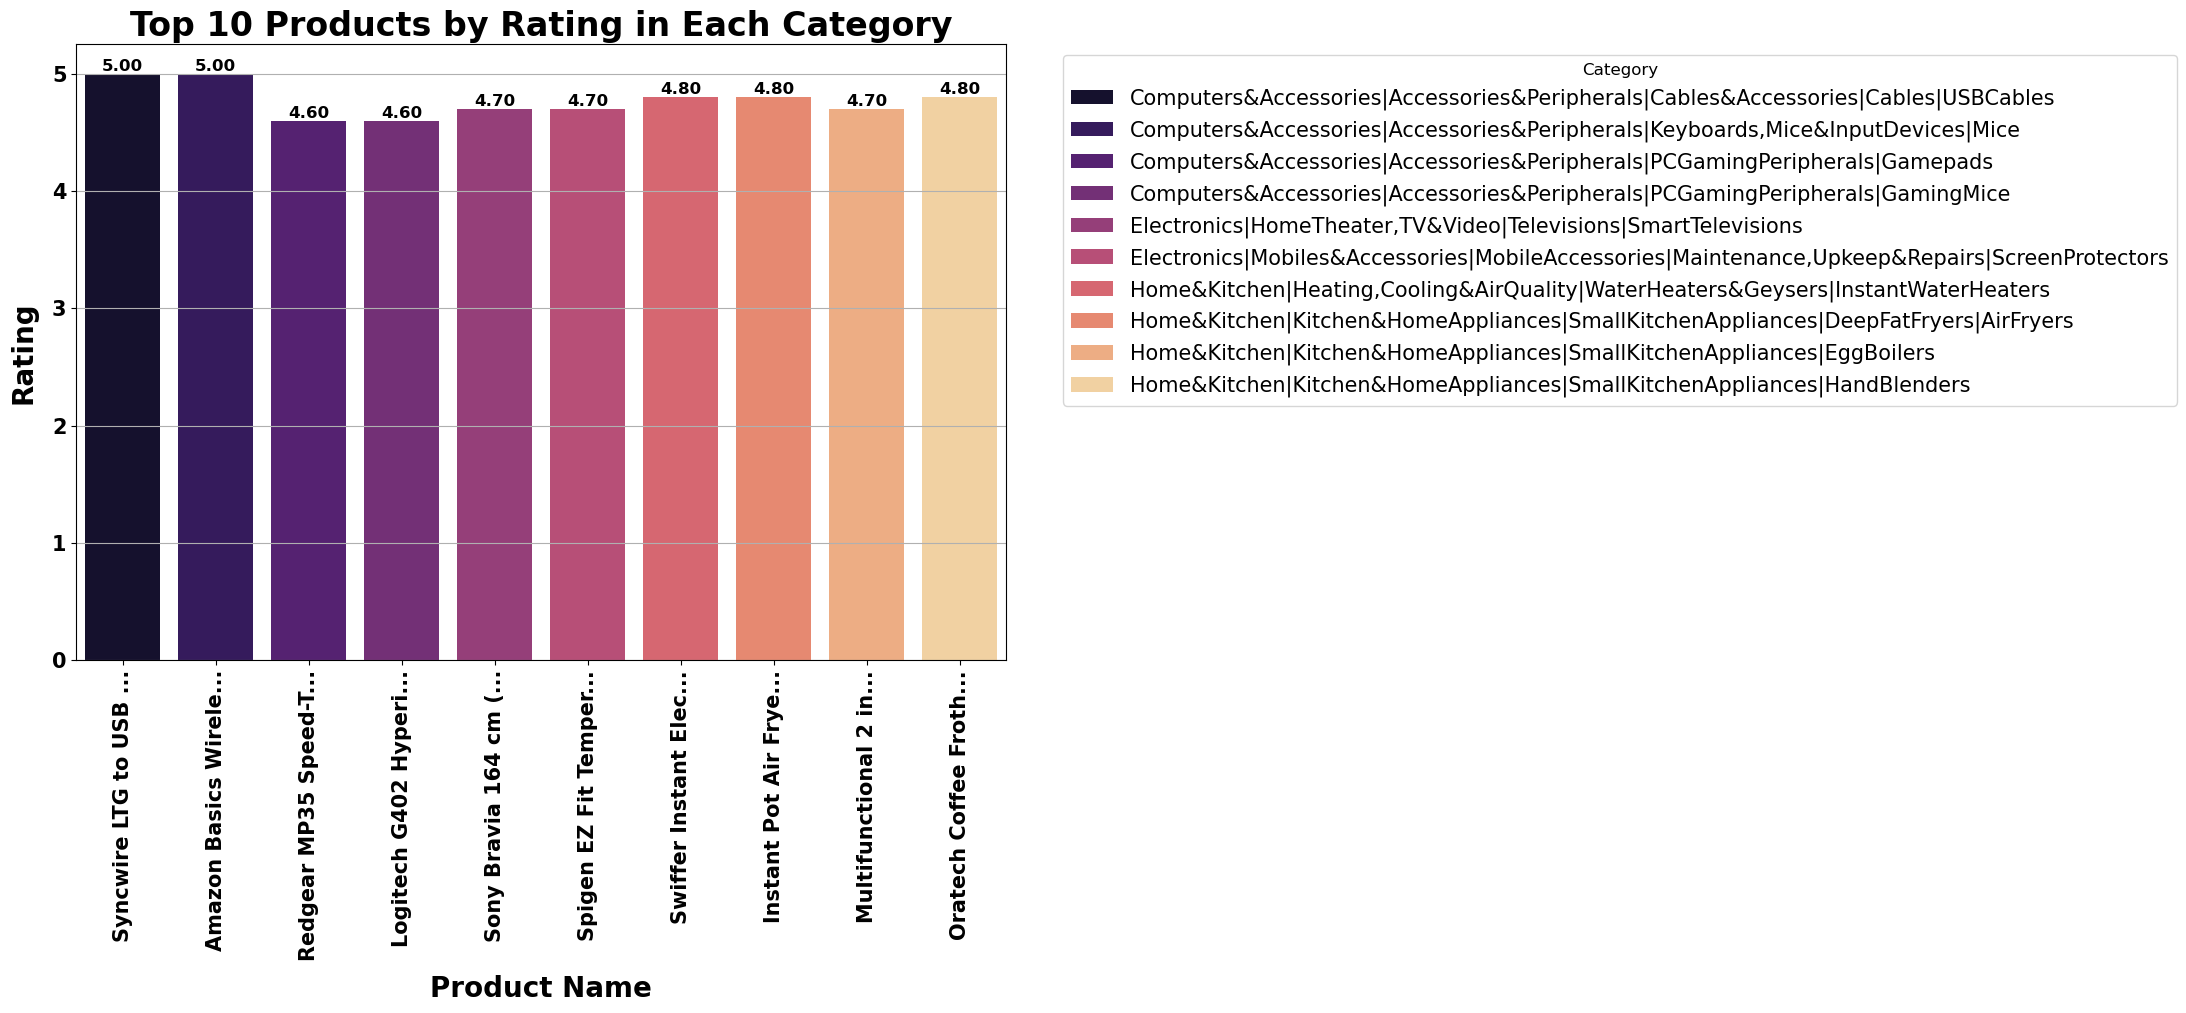

In [21]:
# Identify top products by rating in each category
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Select relevant columns
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Sort by rating and select the first 10 products
top_10_products = top_products_by_category.nlargest(10, 'rating')

# Sort the results by category for better visualization
top_10_products_sorted = top_10_products.sort_values(by='category')

# Create a new column to truncate product names for better visualization
top_10_products_sorted['short_product_name'] = top_10_products_sorted['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(12, 8))  # Adjust size for vertical plot
barplot = sns.barplot(data=top_10_products_sorted, x='short_product_name', y='rating', hue='category', dodge=False, palette='magma')

# Add titles and labels with enhanced prominence
plt.title('Top 10 Products by Rating in Each Category', fontsize=24, fontweight='bold')  # Adjusted title font size
plt.ylabel('Rating', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted y-axis label font size
plt.xlabel('Product Name', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted x-axis label font size

# Adjust legend size
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)

# Make ticks more prominent
plt.xticks(fontsize=15, fontweight='bold', rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=15, fontweight='bold')

# Add value labels above each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y')  # Adjust grid to y-axis for vertical bars

# Show plot
plt.tight_layout()
plt.show()

In [22]:
# Step 1: Find the minimum rating for each category
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]

# Step 2: Select relevant columns
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Step 3: Sort by rating and select the first 10 products
least_10_products = least_products_by_category.nsmallest(10, 'rating')

# Step 4: Display the result
least_10_products_sorted = least_10_products.sort_values(by='category')

# Display the result
least_10_products_sorted

category  \
282          Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
263                                Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
545                                                Electronics|WearableTechnology|SmartWatches   
1309                            Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters   
1251  Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines   
1243                   Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1286            Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders   
1314                        Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Juicers   
1356                  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers   
1449   Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories   

      product_id  \
282   B0B94JPY2N   
263   B09F6D21BY   
545   B0BBVKRP7B   
1309  B0BPJBTB3F   
1251  B08XLR6DSB   
1243  B0BFBNXS94   
1286  B0BNDGL26T   
1314  B08TT63N58   
1356  B0B7L86YCB   
1449  B0BBLHTRM9   

                                                                                                                                                                                 product_name  \
282                                                        Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)   
263                                       7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys   
545                                                                                        SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black)   
1309                                                                                                                                    Khaitan ORFin Fan heater for Home and kitchen-K0 2215   
1251    akiara - Makes life easy Electric Handy Sewing/Stitch Handheld Cordless Portable White Sewing Machine for Home Tailoring, Hand Machine | Mini Silai | White Hand Machine with Adapter   
1243                               Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)   
1286                           MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)   
1314                              ROYAL STEP - AMAZON'S BRAND - Portable Electric USB Juice Maker Juicer Bottle Blender Grinder Mixer,4 Blades Rechargeable Bottle with (Multi color) (MULTI)   
1356                                                                                                Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging   
1449  IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1   

      rating  
282      3.0  
263      3.0  
545      2.8  
1309     2.0  
1251     3.1  
1243     2.3  
1286     2.8  
1314     3.1  
1356     2.6  
1449     2.9

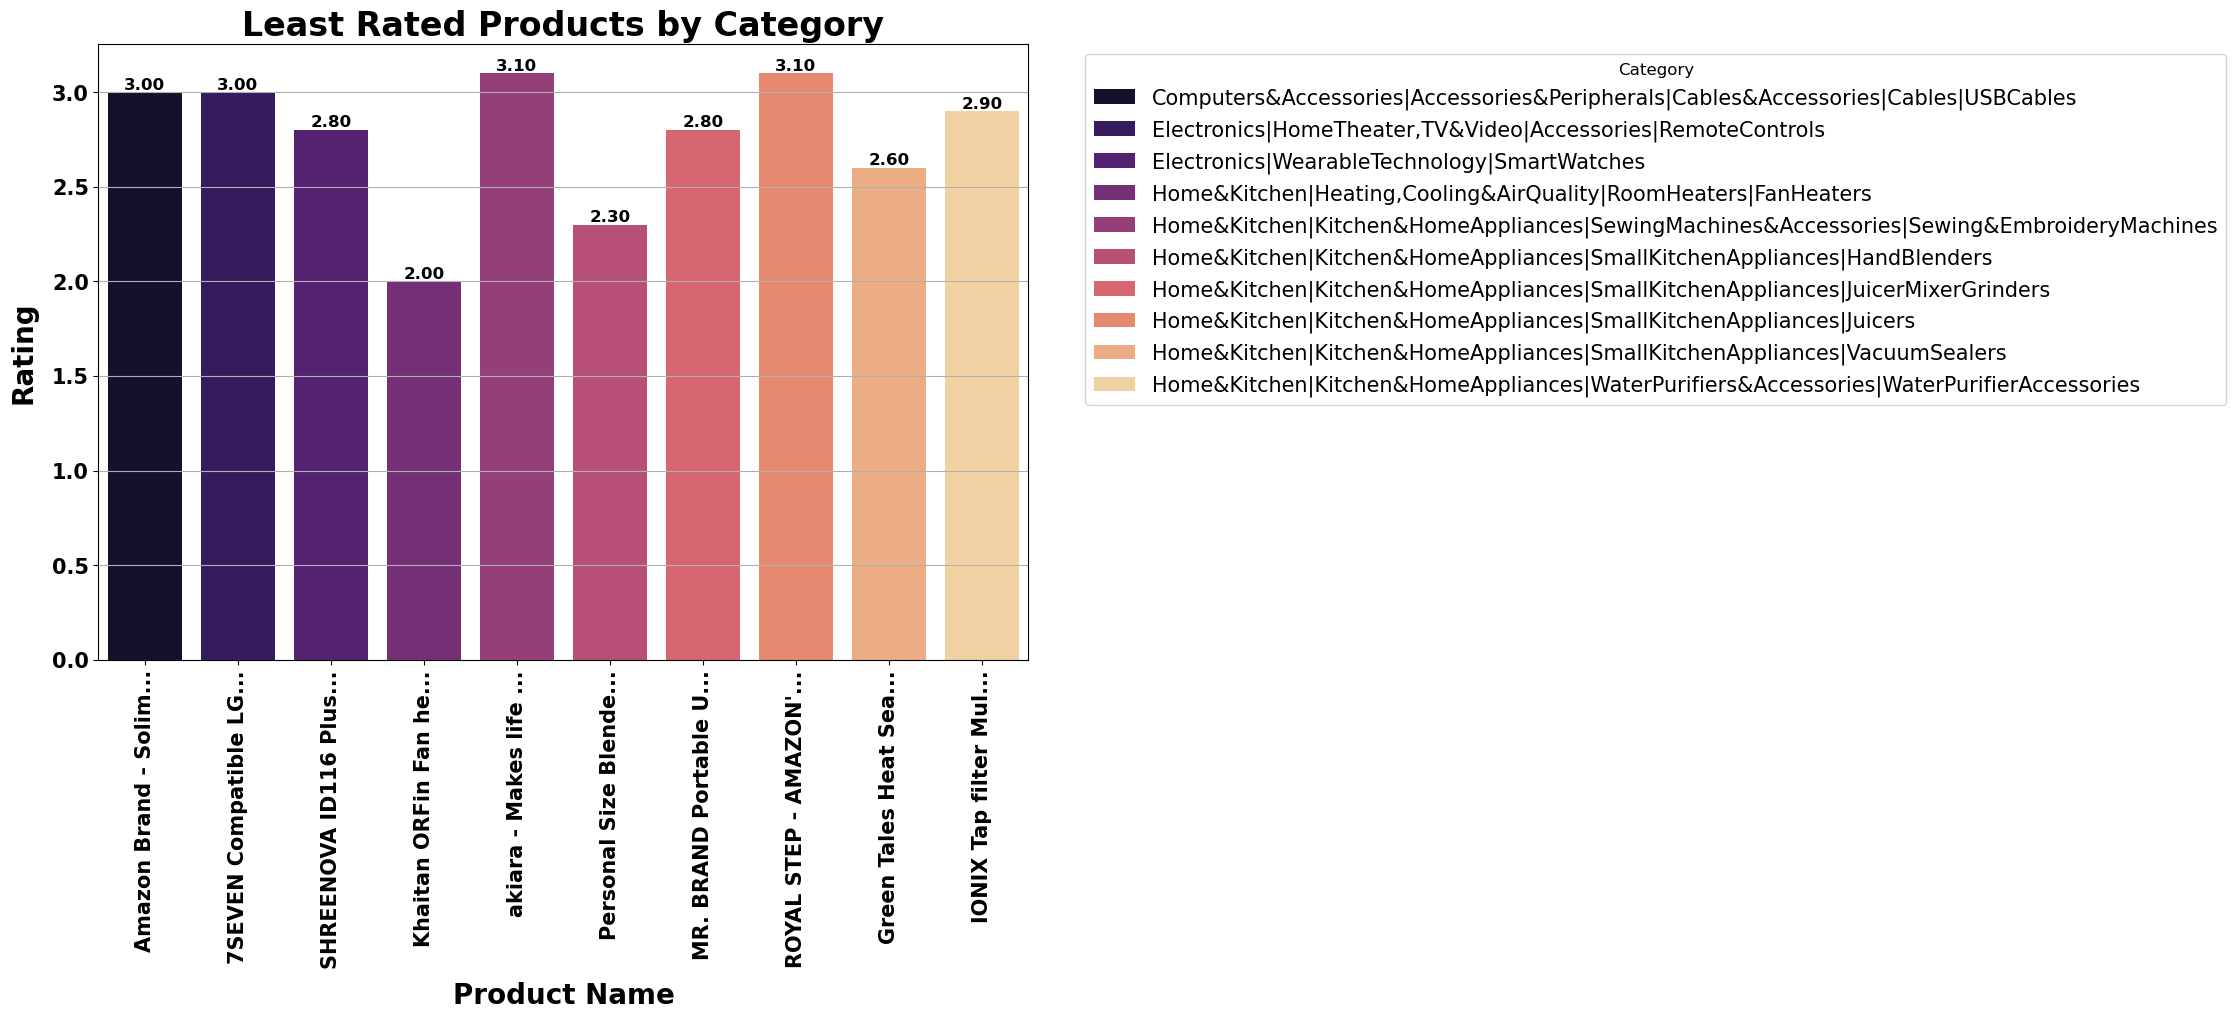

In [23]:
# Step 1: Find the minimum rating for each category
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]

# Step 2: Select relevant columns
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Step 3: Sort by rating and select the first 10 products
least_10_products = least_products_by_category.nsmallest(10, 'rating')

# Step 4: Sort the results by category for better visualization
least_10_products_sorted = least_10_products.sort_values(by='category')

# Create a new column to truncate product names for better visualization
least_10_products_sorted['short_product_name'] = least_10_products_sorted['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(12, 8))  # Adjust size for vertical plot
barplot = sns.barplot(data=least_10_products_sorted, x='short_product_name', y='rating', hue='category', dodge=False, palette='magma')

# Add titles and labels with enhanced prominence
plt.title('Least Rated Products by Category', fontsize=24, fontweight='bold')  # Adjusted title font size
plt.ylabel('Rating', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted y-axis label font size
plt.xlabel('Product Name', fontsize=20, fontweight='bold', labelpad=10)  # Adjusted x-axis label font size

# Adjust legend size
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)

# Make ticks more prominent
plt.xticks(fontsize=15, fontweight='bold', rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=15, fontweight='bold')

# Add value labels above each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y')  # Adjust grid to y-axis for vertical bars

# Show plot
plt.tight_layout()
plt.show()

In [24]:
# Identify products with the highest rating overall
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Display the 10 highest rated products
top_rated_products

category  \
324               Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
174               Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
775                  Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice   
1145               Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters   
1201                        Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1299             Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers   
249                                   Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
1388               Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters   
1226                        Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
459   Electronics|Mobiles&Accessories|MobileAccessories|Maintenance,Upkeep&Repairs|ScreenProtectors   

      product_id  \
324   B0BQRJ3C47   
174   B0BP7XLX48   
775   B09ZHCJDP1   
1145  B0BR4F878Q   
1201  B0BQ3K23Y1   
1299  B0B53DS4TF   
249   B09WN3SRC7   
1388  B0BP89YBC1   
1226  B0BLC2BYPX   
459   B0B23LW7NV   

                                                                                                                                                                                                                                                                      product_name  \
324                                                                                  REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White   
174                                                                                                Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)   
775                                                                                                             Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop   
1145                                                                                          Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))   
1201  Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)   
1299                                                                                              Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)   
249                                                                                                                                                                                               Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)   
1388                                                                            Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB)   
1226                                                                                                                                          Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk,

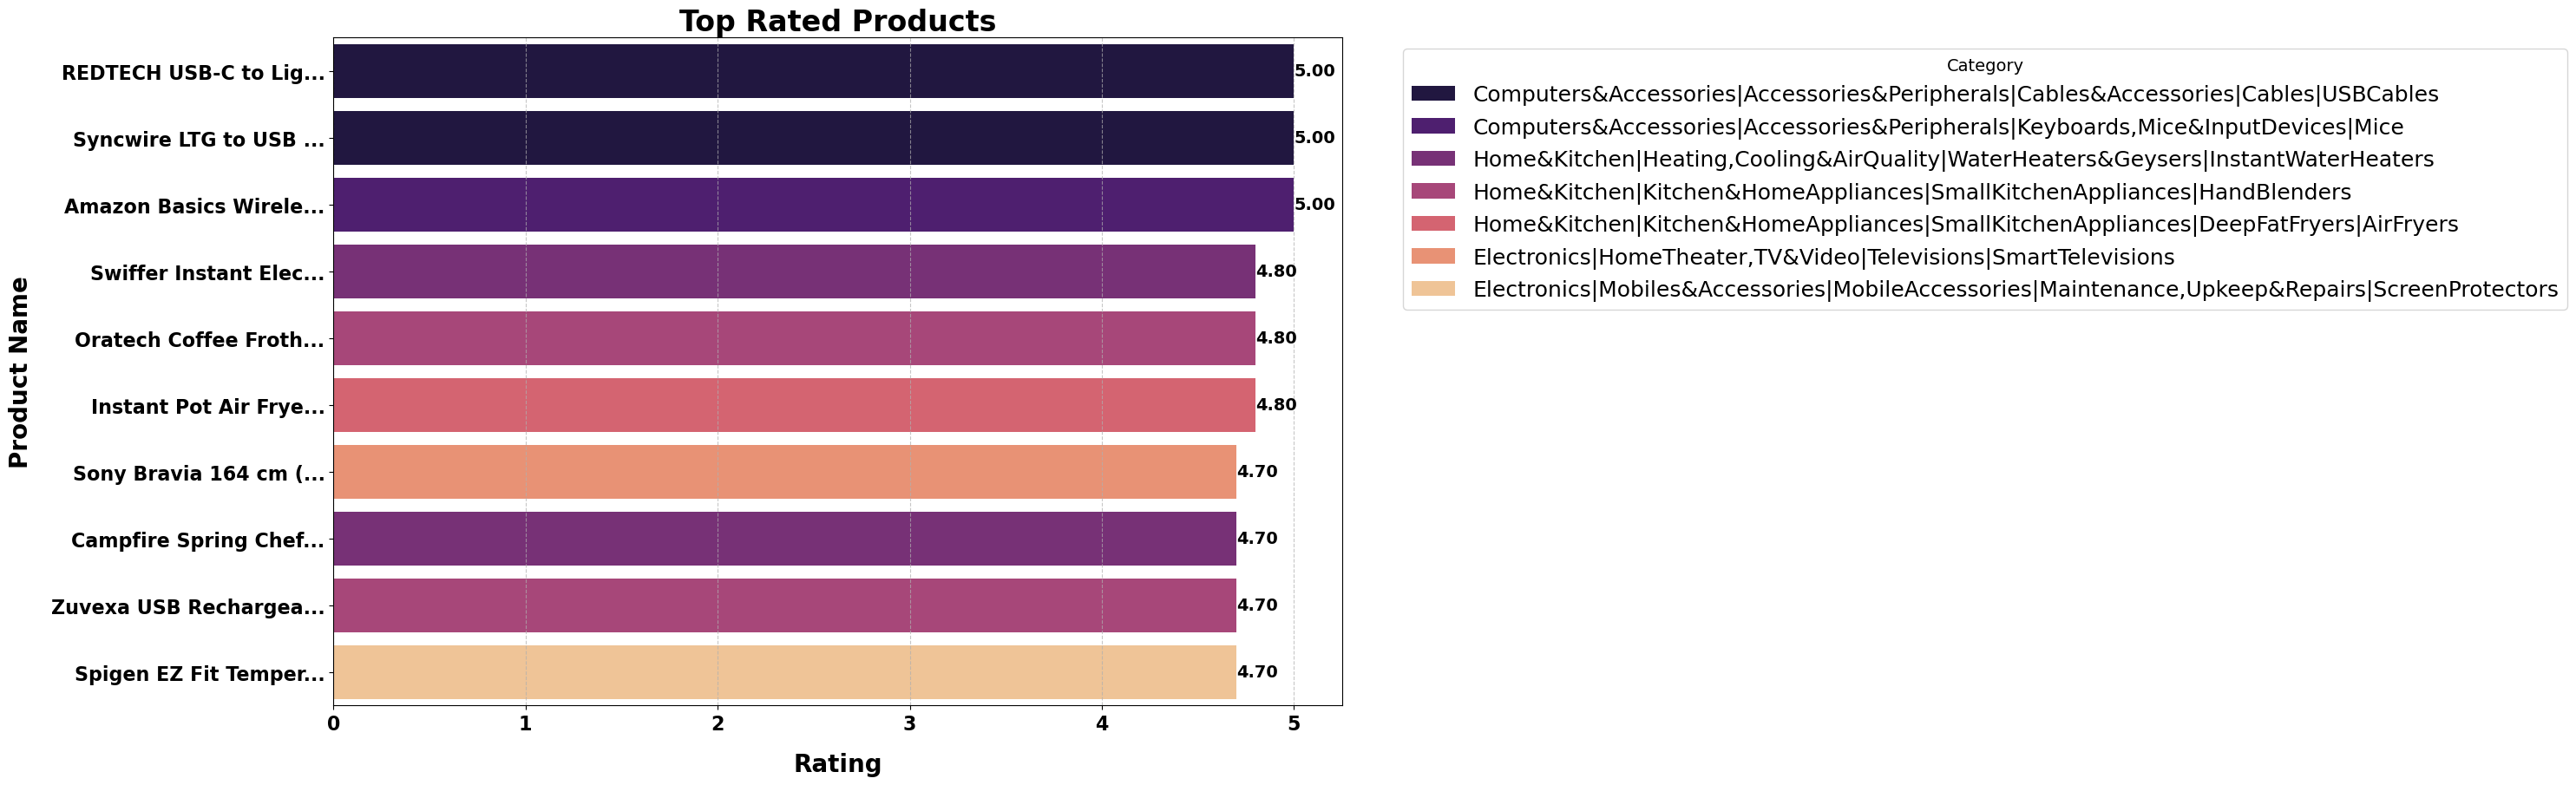

In [25]:
# Identify products with the highest rating overall
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Select relevant columns
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Create a new DataFrame for the plot
top_rated_products['short_product_name'] = top_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(15, 10))

# Create a color palette based on the unique categories
unique_categories = top_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Create a horizontal bar plot with stacked bars
barplot = sns.barplot(data=top_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)

# Add titles and labels with enhanced prominence
plt.title('Top Rated Products', fontsize=24, fontweight='bold')
plt.xlabel('Rating', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=20, fontweight='bold', labelpad=15)

# Adjust legend size and position
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)

# Make ticks more prominent
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Add value labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     fontsize=14, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [26]:
# Identify products with the least rating overall
least_rated_products = df.sort_values(by='rating').head(10)

# Select relevant columns
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Display the 10 least rated products
least_rated_products


category  \
1309                           Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters   
1243                  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders   
1356                 Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers   
1286           Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders   
545                                               Electronics|WearableTechnology|SmartWatches   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories   
263                               Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
282         Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1315                 Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers   
550                                               Electronics|WearableTechnology|SmartWatches   

      product_id  \
1309  B0BPJBTB3F   
1243  B0BFBNXS94   
1356  B0B7L86YCB   
1286  B0BNDGL26T   
545   B0BBVKRP7B   
1449  B0BBLHTRM9   
263   B09F6D21BY   
282   B0B94JPY2N   
1315  B08YK7BBD2   
550   B0B82YGCF6   

                                                                                                                                                                                       product_name  \
1309                                                                                                                                          Khaitan ORFin Fan heater for Home and kitchen-K0 2215   
1243                                     Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)   
1356                                                                                                      Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging   
1286                                 MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)   
545                                                                                              SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black)   
1449        IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1   
263                                             7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys   
282                                                              Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)   
1315  Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer and Cutter Handheld Sealing Machine Portable Bag Resealer Sealer for Plastic Bags Food Storage Snack Fresh Bag Sealer (Including 2 AA Battery)   
550                          Tokdis MX-1 Pro Bluetooth Calling Smartwatch - 1.69” LCD Display, Multiple Watch Faces, Sleep Monitor, Heart & SpO2 Monitoring, Multiple Sports Modes, Water Resistant   

      rating  
1309     2.0  
1243     2.3  
1356     2.6  
1286     2.8  
545      2.8  
1449     2.9  
263      3.0  
282      3.0  
1315     3.0  
550      3.0

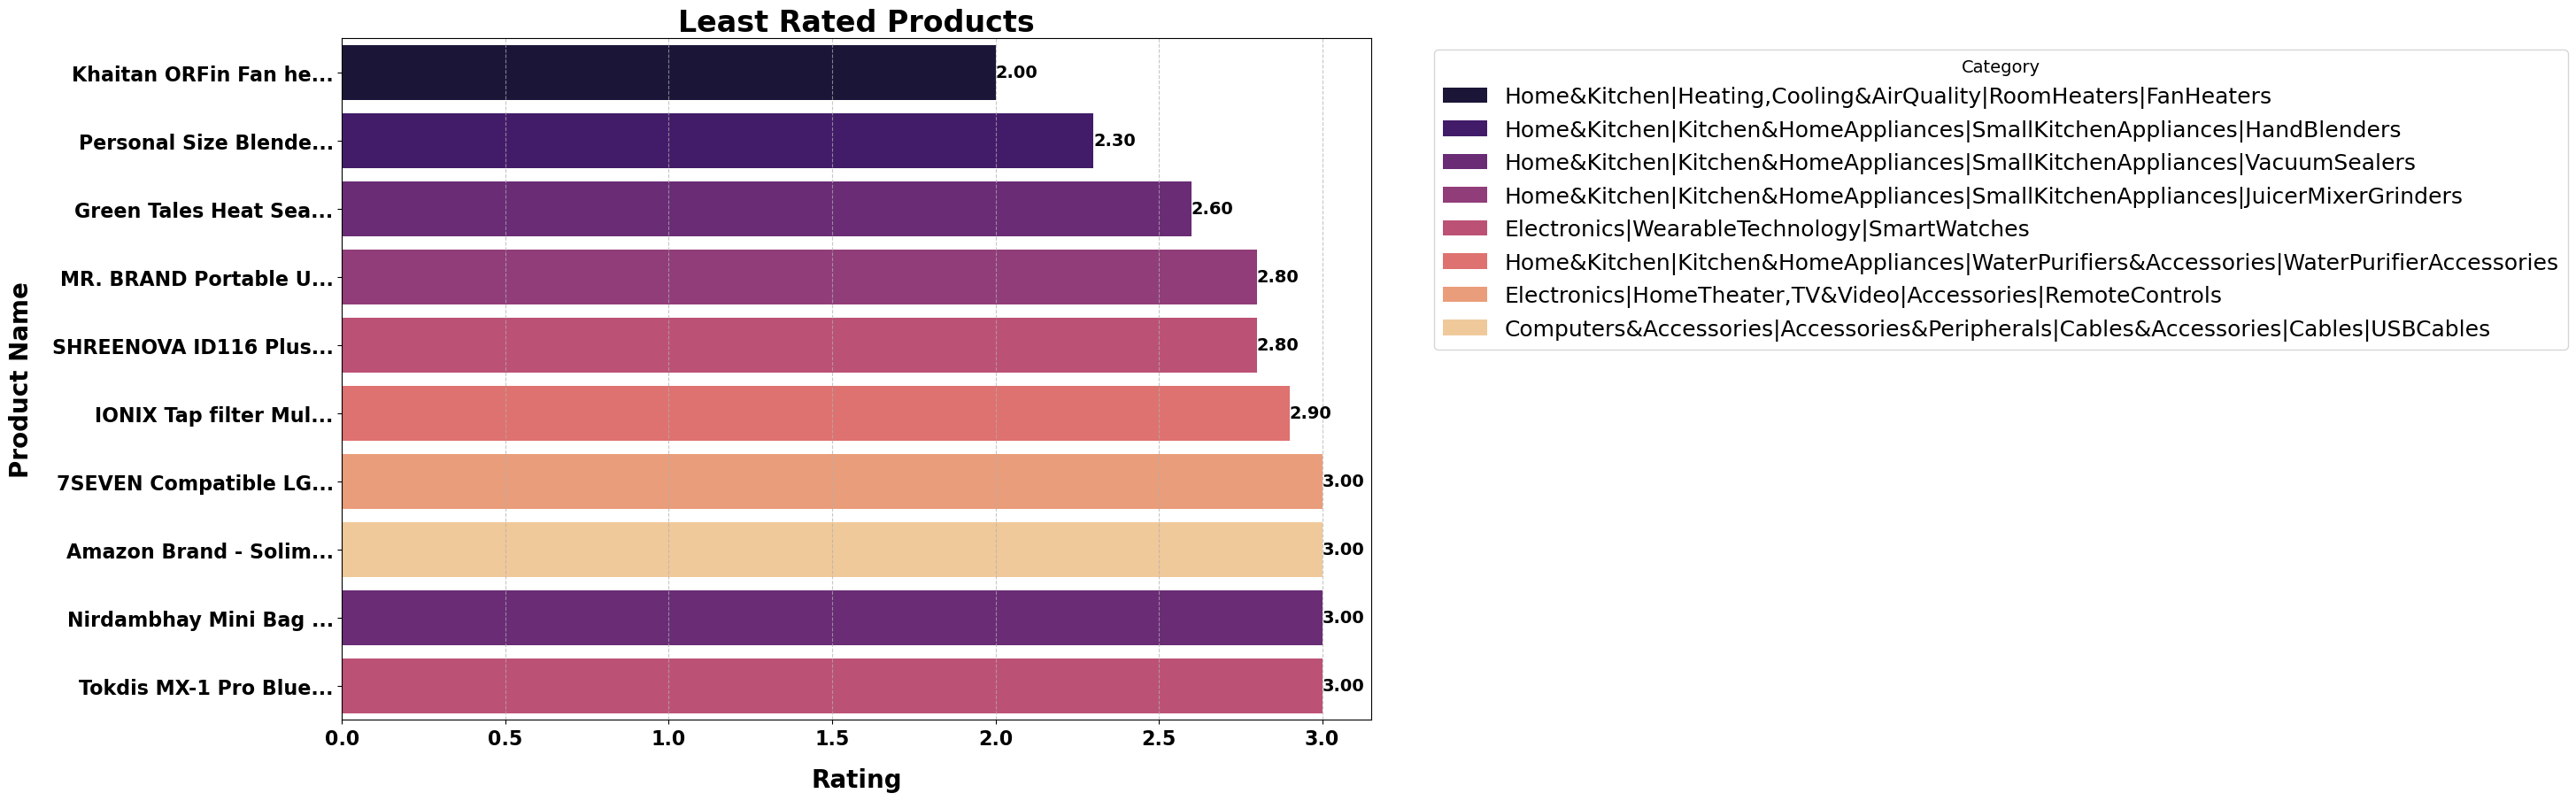

In [27]:
# Identify products with the least rating overall
least_rated_products = df.sort_values(by='rating').head(10)

# Select relevant columns
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Create a new DataFrame for the plot
least_rated_products['short_product_name'] = least_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Set the aesthetics for the plot
plt.figure(figsize=(15, 10))

# Create a color palette based on the unique categories
unique_categories = least_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Create a horizontal bar plot with stacked bars
barplot = sns.barplot(data=least_rated_products, y='short_product_name', x='rating', hue='category', dodge=False, palette=category_color_map)

# Add titles and labels with enhanced prominence
plt.title('Least Rated Products', fontsize=24, fontweight='bold')
plt.xlabel('Rating', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Product Name', fontsize=20, fontweight='bold', labelpad=15)

# Adjust legend size and position
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)

# Make ticks more prominent
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Add value labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.2f}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     fontsize=14, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [28]:
# Calculate the mean rating based on discounted price ranges
df['price_range'] = pd.cut(df['discounted_price'], bins=[30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0],
                           labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+'])
                           


price_rating_analysis = df.groupby('price_range').agg(
    mean_rating=('rating', 'mean'),
    product_count=('product_id', 'nunique'),
    average_rating_count=('rating_count', 'mean')
).reset_index()

# Display the price rating analysis
price_rating_analysis

price_range  mean_rating  product_count  average_rating_count
0      30-100     4.064444             40           7440.977778
1     100-500     4.075330            461          17813.723164
2    500-1000     4.117063            237          21177.813492
3   1000-5000     4.077355            410          18257.164733
4  5000-10000     4.141667             84          21546.571429
5      10000+     4.195082            119          16143.188525

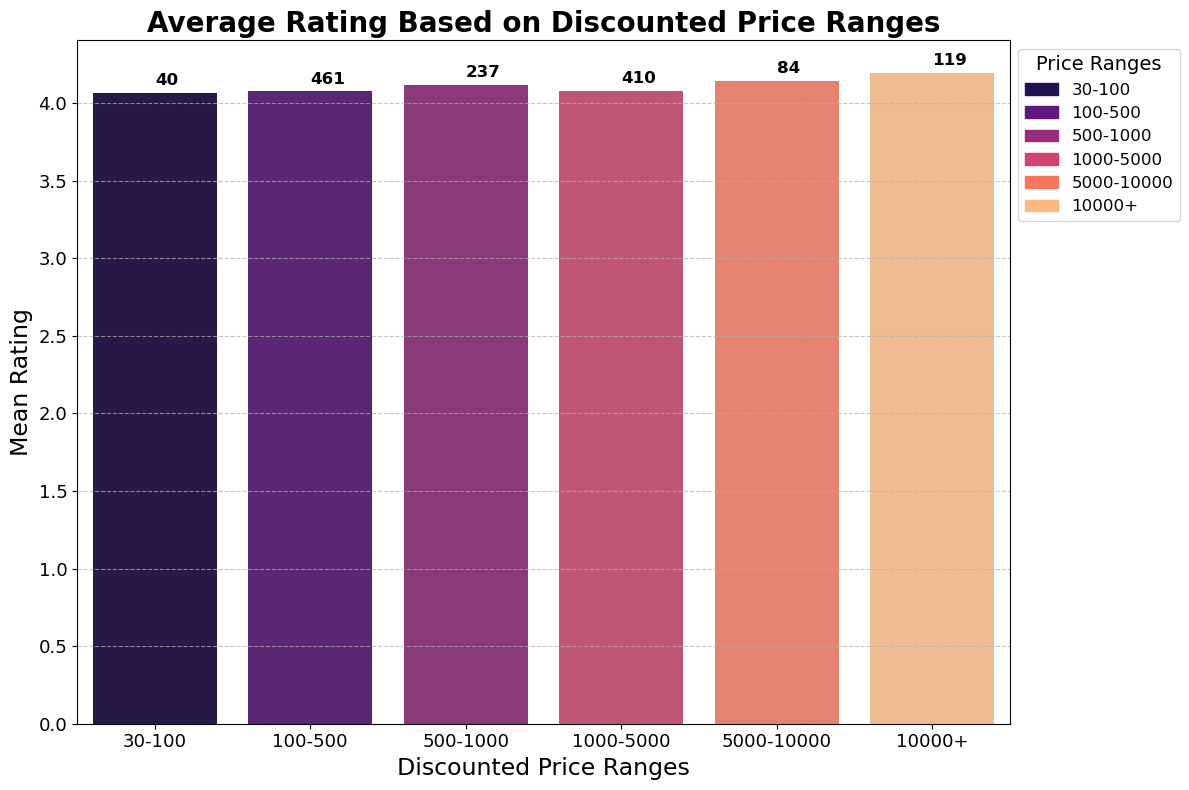

In [29]:
# Set the aesthetics for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for mean ratings with the magma palette
bar_plot = sns.barplot(data=price_rating_analysis, x='price_range', y='mean_rating', palette='magma', capsize=0.1)

# Add data labels for product count
for index, row in price_rating_analysis.iterrows():
    plt.text(index, row['mean_rating'] + 0.05, 
             f'{row["product_count"]}',  
             fontsize=12, 
             fontweight='bold', 
             color='black')

# Titles and labels
plt.title('Average Rating Based on Discounted Price Ranges', fontsize=20, fontweight='bold')
plt.xlabel('Discounted Price Ranges', fontsize=17)
plt.ylabel('Mean Rating', fontsize=17)

# Enhance ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a custom legend
# Create patches for the legend using the colors from the palette
from matplotlib.patches import Patch

# Generate a list of colors from the 'magma' palette for the legend
colors = sns.color_palette('magma', len(price_rating_analysis))
legend_labels = price_rating_analysis['price_range'].tolist()

# Create legend handles
handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=handles, title='Price Ranges', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

In [30]:
# Create a new DataFrame for analysis
category_product_counts = df.groupby('category').agg(
    product_count=('product_id', 'nunique'),
    total_reviews=('review_id', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()

# Calculate the ratio of total reviews to product count
category_product_counts['reviews_per_product'] = category_product_counts['total_reviews'] / category_product_counts['product_count']

# Display the analysis
category_product_counts.sort_values(by='mean_rating', ascending=False, inplace=True)
# Filter for categories with highest product count and total reviews
top_categories = category_product_counts.nlargest(10, 'product_count')

# Display the top 10 categories
top_categories.sort_values(by='total_reviews', ascending=False)

category  \
10                       Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
119                                                            Electronics|WearableTechnology|SmartWatches   
117                                   Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones   
97                                           Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
76                                            Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear   
93                                             Electronics|HomeTheater,TV&Video|Accessories|RemoteControls   
169                               Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders   
18                          Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice   
181  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons   
140                       Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters   

     product_count  total_reviews  mean_rating  reviews_per_product  
10             161            233     4.151931             1.447205  
119             62             76     4.025000             1.225806  
117             68             68     4.100000             1.000000  
97              60             63     4.209524             1.050000  
76              51             52     3.898077             1.019608  
93              49             49     3.800000             1.000000  
169             27             27     4.011111             1.000000  
18              24             24     4.287500             1.000000  
181             24             24     4.129167             1.000000  
140             23             23     4.052174             1.000000

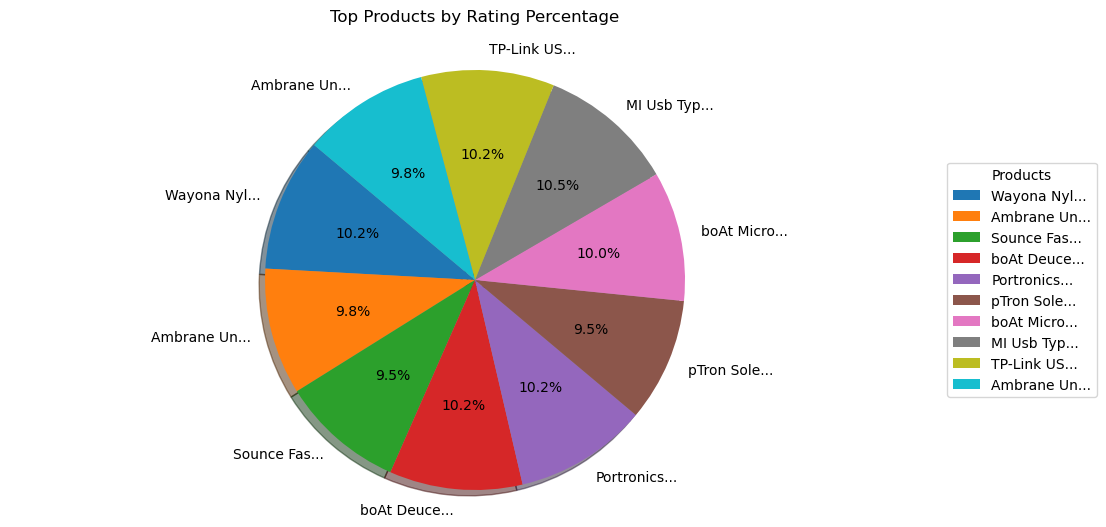

In [31]:
# Calculate rating percentage 
df['rating_percentage'] = (df['rating'] / 5) * 100

# Select the top products by rating percentage for clarity in the pie chart
top_products = df[['product_id', 'product_name', 'category', 'rating_percentage']].head(10)

# Create a concise label for the legend
top_products['label'] = top_products['product_name'].str[:10] + '...'  # Display first 10 characters with ellipsis

# Plot the pie chart with an increased figure size
plt.figure(figsize=(12, 6))  # Increased size
plt.pie(top_products['rating_percentage'], labels=top_products['label'], autopct='%1.1f%%', startangle=140, shadow=True)

# Add title and legend with padding
plt.title('Top Products by Rating Percentage', pad=20)  # Added pad for distance
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(top_products['label'], title='Products', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [32]:
# Calculate rating percentage
df['rating_percentage'] = (df['rating'] / 5) * 100

# Display the updated DataFrame with the new column
df[['product_id', 'product_name', 'category', 'rating', 'rating_percentage']].head()


product_id  \
0  B07JW9H4J1   
1  B098NS6PVG   
2  B096MSW6CT   
3  B08HDJ86NZ   
4  B08CF3B7N1   

                                                                                                                                                                                              product_name  \
0                                       Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)   
1        Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)   
2                                                                 Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)   
4                                                                                           Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)   

                                                                            category  \
0  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
1  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
2  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
3  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   
4  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables   

   rating  rating_percentage  
0     4.2               84.0  
1     4.0               80.0  
2     3.9               78.0  
3     4.2               84.0  
4     4.2               84.0

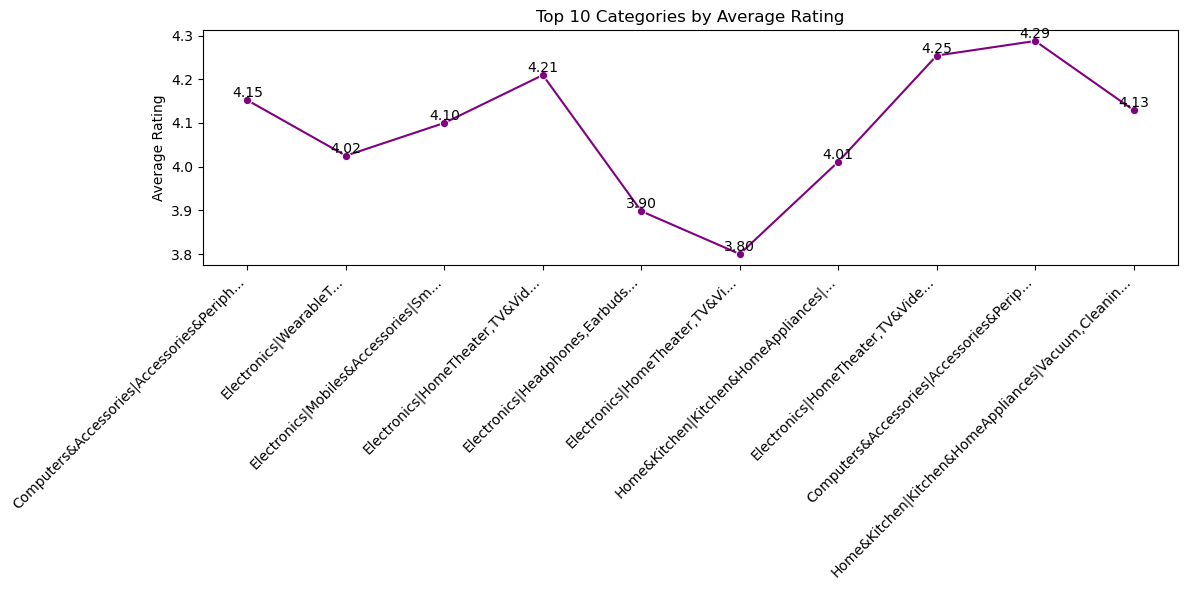

In [33]:
# Group by category and calculate product count and average rating
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),  # Count of products per category
    average_rating=('rating', 'mean')  # Average rating per category
).reset_index()

# Sort the summary by product count in descending order and take the top 10
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)

# Shorten category names
shortened_categories = [f"{cat[:len(cat)//2]}..." for cat in top_categories['category']]

# Create a line plot for average ratings
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=shortened_categories, y='average_rating', data=top_categories, marker='o', color='purple')

# Add values on the line plot
for index, value in enumerate(top_categories['average_rating']):
    line_plot.text(index, value, f'{value:.2f}', color='black', ha='center', va='bottom')

# Set labels and title
plt.ylabel('Average Rating', color='black')
plt.title('Top 10 Categories by Average Rating')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

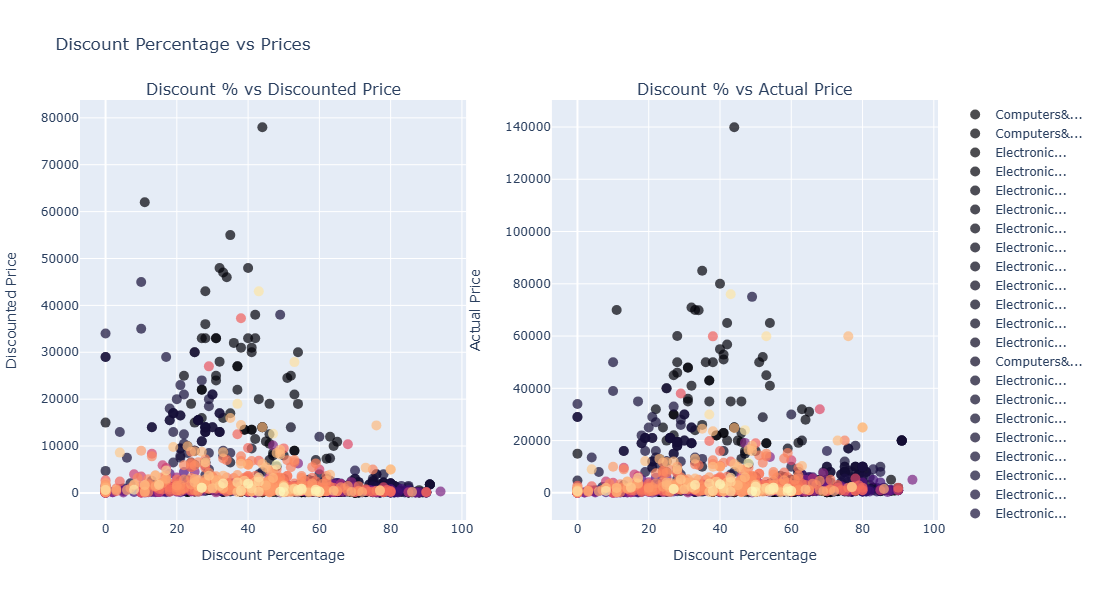

In [34]:
# Create a subplot figure with two scatterplots side by side
fig = make_subplots(rows=1, cols=2, subplot_titles=("Discount % vs Discounted Price", "Discount % vs Actual Price"))

# Create a color map based on the magma color palette
categories = df['category'].unique()
colors = sns.color_palette("magma", len(categories))  # Get magma palette colors

# Map colors to categories
color_map = {category: f'rgba({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)}, 0.7)' 
             for category, color in zip(categories, colors)}

# Abbreviate category names for the legend
category_abbreviations = {category: category[:10] + '...' if len(category) > 10 else category for category in categories}

# Scatterplot: Discount % vs Discounted Price
for category in categories:
    category_data = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['discount_percentage'],
        y=category_data['discounted_price'],
        mode='markers',
        marker=dict(color=color_map[category], size=10),
        name=category_abbreviations[category],  # Use abbreviated names in the legend
        hoverinfo='text',
        hovertemplate=(
            f"<b>Category:</b> {category}<br>" +
            f"<b>Discount %:</b> %{{x}}<br>" +
            f"<b>Discounted Price:</b> $%{{y}}<br>" +
            "<extra></extra>"
        )
    ), row=1, col=1)

# Scatterplot: Discount % vs Actual Price
for category in categories:
    category_data = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['discount_percentage'],
        y=category_data['actual_price'],
        mode='markers',
        marker=dict(color=color_map[category], size=10),
        name=category_abbreviations[category],  # Use abbreviated names in the legend
        hoverinfo='text',
        hovertemplate=(
            f"<b>Category:</b> {category}<br>" +
            f"<b>Discount %:</b> %{{x}}<br>" +
            f"<b>Actual Price:</b> ₹%{{y}}<br>" +
            "<extra></extra>"
        )
    ), row=1, col=2)

# Update layout
fig.update_layout(title_text="Discount Percentage vs Prices", showlegend=True,
                  height=600, width=1000)

# Update axes labels and formatting
fig.update_xaxes(title_text="Discount Percentage", row=1, col=1)
fig.update_yaxes(title_text="Discounted Price", row=1, col=1, tickformat=".0f")  # Full number format

fig.update_xaxes(title_text="Discount Percentage", row=1, col=2)
fig.update_yaxes(title_text="Actual Price", row=1, col=2, tickformat=".0f")  # Full number format

# Show plot
fig.show()

In [35]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(df[['actual_price', 'discounted_price', 'rating']].describe())

# 2. Correlation Analysis
correlation_actual = df['actual_price'].corr(df['rating'])
correlation_discounted = df['discounted_price'].corr(df['rating'])
print("\nCorrelation between Actual Price and Rating:", correlation_actual)
print("Correlation between Discounted Price and Rating:", correlation_discounted)

Descriptive Statistics:
        actual_price  discounted_price       rating
count    1465.000000       1465.000000  1465.000000
mean     5444.990635       3125.310874     4.096546
std     10874.826864       6944.304394     0.291578
min        39.000000         39.000000     2.000000
25%       800.000000        325.000000     4.000000
50%      1650.000000        799.000000     4.100000
75%      4295.000000       1999.000000     4.300000
max    139900.000000      77990.000000     5.000000

Correlation between Actual Price and Rating: 0.1216729707567191
Correlation between Discounted Price and Rating: 0.12035456289817409
